## Time-Dependent Hamiltonian for a Two-Level System

We consider a two-level system described by the Hamiltonian:

$$
\hat{H}(t) = -\frac{\Delta}{2} \, \hat{\sigma}_x - \frac{\epsilon(t)}{2} \, \hat{\sigma}_z.
$$

### Explanation of Terms:
- **Δ**: Time-independent coupling strength between the two basis states.
- **ε(t)**: Time-dependent bias or detuning term.
- **\( \hat{\sigma}_x \)** and **\( \hat{\sigma}_z \)**: Pauli matrices given by:
  $$
  \hat{\sigma}_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
  \hat{\sigma}_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.
  $$

### Harmonic Driving Assumption:
For definiteness and simplicity in the algebra, we assume harmonic driving, i.e., we assume that \( \epsilon(t) \) can be expressed as:

$$
\epsilon(t) = \epsilon_0 + A \cos(\omega t + \varphi),
$$

where:
- **\( \epsilon_0 \)**: The static bias term.
- **A**: Amplitude of the oscillating driving term.
- **ω**: Frequency of the driving term.
- **\( \varphi \)**: Phase of the oscillation.

This Hamiltonian represents a qubit subject to both transverse and longitudinal fields, commonly used in quantum control and Landau-Zener dynamics.


In [34]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Step-1: Define Hamiltonian

delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
A = 2.5 * 2*np.pi
omega = 1.0 * 2*np.pi
H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, 'sin(w * t)']]




 ## FloquetBasis class

 Floquet modes corresponding to the Hamiltonian can then be calculated using the FloquetBasis class, which encapsulates the Floquet modes and the quasienergies:

In [41]:
#Hamiltonian here is H = H0 + Hint*cos(omega*t)
#where H0=0.5*Delta*sigma_z + epsilon*sigma_x
#and Hint=0.5*Vstr*sigma_z
#and omega is the frequency of the driving
T = 2*np.pi / omega
tlist  = np.linspace(0.0, 10 * T, 101)

floquet_basis = FloquetBasis(H, T, args)

f_energies = floquet_basis.e_quasi

f_mode = floquet_basis.mode(0)



we obtain the Floquet mode at some later time 
 using FloquetBasis.mode:

In [45]:
floquet_basis.mode(1)


[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.72964233+0.j        ]
  [-0.39993746+0.55468198j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.39993746+0.55468198j]
  [0.72964233+0.j        ]]]

In [46]:
floquet_basis.state(1)


[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.69480041+0.22277864j]
  [ 0.2114809 -0.650306j  ]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.2114809 -0.650306j  ]
  [-0.69480041-0.22277864j]]]

We find the wavefunction solution to the original problem for given some initial state 

In [49]:
import matplotlib.pyplot as plt

psi0   = qutip.basis(2, 0)

print(psi0)

# decompose the inital state in the floquet modes
f_coeff = floquet_basis.to_floquet_basis(psi0)


f_coeff

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.72964233+0.j        ]
 [0.39993746-0.55468198j]]

We can easily evaluate the wavefunction that is the solution at an arbitrary time using the function FloquetBasis.from_floquet_basis:

4.221638438096821e-31
0.00393074488568904
0.015155739057945851
0.027269319017656064
0.032767078920872786
0.040003482777650964
0.06389533494197766
0.0774340602205941
0.05248138211852664
0.06465137857816003
0.09283293586251876
0.11320305152707538
0.146659259203542
0.19094535455560724
0.21862598051468082
0.23908206773069698
0.285267246116122
0.31091657491677516
0.26480084889803795
0.2866624112855233
0.33671476742579864
0.36727764343161207
0.4115866488283655
0.4715310775984459
0.5099752344775492
0.5346738625923015
0.5852849393526585
0.6146138668722858
0.5645299060103044
0.5867966996458298
0.6407030782129348
0.6714112705381057
0.7111476993754148
0.764397358871268
0.7981720402191789
0.8165540427285514
0.8520731928121222
0.8752786087610662
0.8399009627028318
0.8531355440327006
0.8914420213102541
0.9121938981438543
0.933637468969841
0.9603357052574196
0.9757491306329257
0.9796107817511679
0.9861478903480372
0.9957101138171432
0.9882294148667707
0.9863624108817086
0.9954321947985145
0.999838788

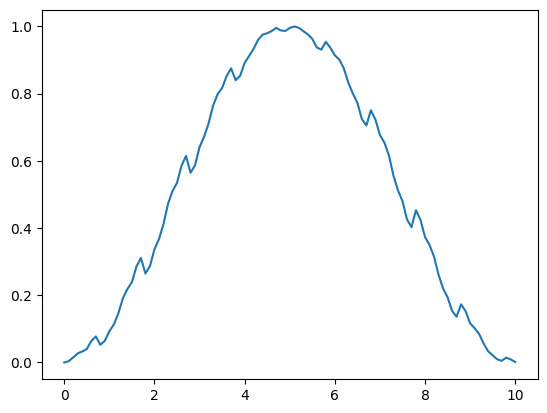

: 

In [ ]:
p_ex = np.zeros(len(tlist))

for n, t in enumerate(tlist):
    psi_t = floquet_basis.from_floquet_basis(f_coeff, t)
    p_ex[n] = qutip.expect(qutip.num(2), psi_t)
    print(p_ex[n])


plt.plot(tlist, p_ex)
plt.show()


# Floquet-Markov Master Equation in QuTiP

The `fmmesolve` function in QuTiP solves time-periodic open quantum systems using the **Floquet-Markov master equation**. This approach combines Floquet theory (for periodic Hamiltonians) with a Markovian master equation to model dissipative dynamics under periodic driving.

## Key Features
- **Use Case**: Systems with periodic time-dependent Hamiltonians and weak coupling to a Markovian bath.
- **Assumptions**:
  - Hamiltonian is periodic: `H(t + T) = H(t)`.
  - Weak system-bath interaction (Born approximation).
  - Markovian (memoryless) bath.

## How It Works
1. **Floquet Decomposition**: Solves for Floquet modes and quasi-energies of the periodic Hamiltonian.
2. **Transition Rates**: Computes bath-induced transitions between Floquet states.
3. **Master Equation**: Constructs a Lindblad-form master equation in the Floquet basis.

---

### Transition Probability between two states(Two-level system under strong driving)

In [1]:
# eigenvalue decomposition and sorting
def eigen_sorter(H):
    evals, evecs = sp.linalg.eig(H)
    _zipped = list(zip(evals, range(len(evals))))
    _zipped.sort()
    evals, perm = list(zip(*_zipped))
    evecs = np.array([evecs[:, k] for k in perm])
    return np.array(evals), np.array(evecs)

# floquet transition probabilities
def floquet(H0, Hint, omega, n_ph, measvec):
    # overlap probability
    overlap_prob = 0
    # spectral decomposition of H0
    evals_0, evecs_0 = eigen_sorter(H0)
    # atom Hamiltonian
    H_atom = np.kron(np.eye(n_ph), H0)
    # photon range
    max_ph = int(np.floor(n_ph / 2))
    # dimension of the system
    dim = len(H0)
    # photon Hamiltonian
    H_ph = omega * np.kron(np.diag([k for k in range(-max_ph, max_ph + 1)]), np.eye(dim))
    # interactions
    temp_v = np.array([int(k == 1) for k in range(n_ph)])
    # interaction Hamiltonian
    H_int = np.kron(sp.linalg.toeplitz(temp_v), Hint)
    # construct the full Hamiltonian
    H = H_atom + H_ph + H_int
    # ground state
    psi_g = np.kron(np.array([int(k == max_ph) for k in range(n_ph)]), evecs_0[-1])
    # spectral decomposition of H
    evals, evecs = eigen_sorter(H)
    # loop over all the transitions
    for k_c in range(1, n_ph + 1):
        temp_v = np.array([int(k == k_c) for k in range(n_ph)])
        psi_m = np.kron(temp_v, measvec)
        for evec in evecs:
            overlap = psi_m.T.conjugate() @ np.outer(evec.T.conjugate(), evec) @ psi_g
            overlap_prob += np.real(np.conjugate(overlap) * overlap)
    # return total transition probability
    return overlap_prob


  0%|          | 0/600 [00:00<?, ?it/s]C:\Users\DELL\AppData\Local\Temp\ipykernel_1120\1577251510.py:22: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  evals_un, evecs_un = sp.sparse.linalg.eigsh(H0)
100%|██████████| 600/600 [00:13<00:00, 45.01it/s]


Text(0, 0.5, 'Absorption probability')

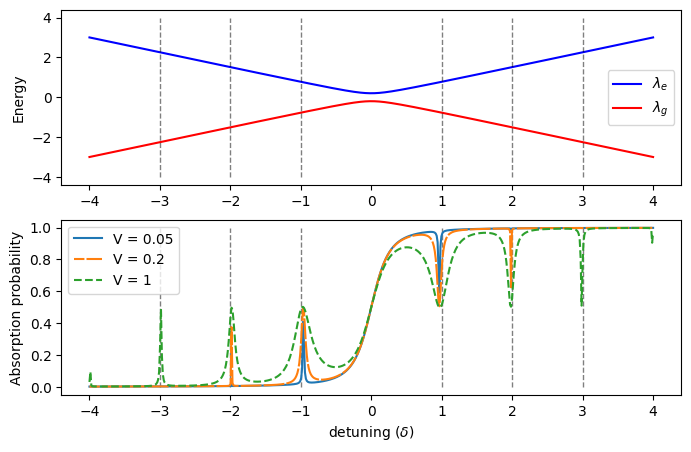

In [5]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import scipy as sp
# input
measvec = np.array([1, 0])
epsilon = 0.2
Deltas = np.linspace(-6, 6, 600)
omega = 1.5
n_ph = 13
Vs = [0.05, 0.2, 1]
sx, sz = np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]])

# allocate memory
abs_av = np.zeros((len(Deltas), len(Vs)))
spec = np.zeros((2, len(Deltas)))

# compute
for iD, Delta in enumerate(tqdm(Deltas)):
    for iV, V in enumerate(Vs):
        H0 = Delta / 2 * sz + epsilon * sx
        evals_un, evecs_un = sp.sparse.linalg.eigsh(H0)
        # sort
        evals = np.sort(evals_un)
        evecs = evecs_un[:, evals_un.argsort()]
        spec[:, iD] = np.sort(evals)
        Hint = V * sz / 2
        abs_av[iD, iV] = floquet(H0, Hint, omega, n_ph, measvec)

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(Deltas / omega, spec[1], 'b-', label=r'$\lambda_e$')
ax[0].plot(Deltas / omega, spec[0], 'r-', label=r'$\lambda_g$')
ax[0].legend()
ax[0].set_ylabel(r'Energy')
ax[0].vlines([k for k in range(-3, 3 + 1) if k != 0], -4, 4, linestyles='dashed', linewidths=1, colors='black', alpha=0.5)
ax[1].vlines([k for k in range(-3, 3 + 1) if k != 0], 0, 1, linestyles='dashed', linewidths=1, colors='black', alpha=0.5)
ax[1].plot(Deltas / omega, abs_av.T[0], label='V = ' + str(Vs[0]))
ax[1].plot(Deltas / omega, abs_av.T[1], linestyle=(5, (10, 1)), label='V = ' + str(Vs[1]))
ax[1].plot(Deltas / omega, abs_av.T[2], '--', label='V = ' + str(Vs[2]))
ax[1].legend()
ax[1].set_xlabel(r'detuning ($\delta$)')
ax[1].set_ylabel(r'Absorption probability')
# fig.savefig('figures/floquet.pdf')


In [ ]:
import numpy as np
import scipy as sp
# input
measvec = np.array([1, 0])
epsilon = 0.2
Deltas = np.linspace(-6, 6, 600)
omega = 1.5
n_ph = 13
Vs = [0.05, 0.2, 1]
sx, sz = np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]])

H0 = Delta / 2 * sz + epsilon * sx
Hint = V * sz / 2



# eigenvalue decomposition and sorting
def eigen_sorter(H):
    evals, evecs = sp.linalg.eig(H)
    _zipped = list(zip(evals, range(len(evals))))
    _zipped.sort()
    evals, perm = list(zip(*_zipped))
    evecs = np.array([evecs[:, k] for k in perm])
    return np.array(evals), np.array(evecs)

# floquet transition probabilities
def floquet(H0, Hint, omega, n_ph, measvec):
    # overlap probability
    overlap_prob = 0
    # spectral decomposition of H0
    evals_0, evecs_0 = eigen_sorter(H0)
    # atom Hamiltonian
    H_atom = np.kron(np.eye(n_ph), H0)
    # photon range
    max_ph = int(np.floor(n_ph / 2))
    # dimension of the system
    dim = len(H0)
    # photon Hamiltonian
    H_ph = omega * np.kron(np.diag([k for k in range(-max_ph, max_ph + 1)]), np.eye(dim))




(26, 26)

In [32]:
# overlap probability
overlap_prob = 0
# spectral decomposition of H0
evals_0, evecs_0 = eigen_sorter(H0)
# atom Hamiltonian
H_atom = np.kron(np.eye(n_ph), H0)
# photon range
max_ph = int(np.floor(n_ph / 2))
# dimension of the system
dim = len(H0)
# photon Hamiltonian
H_ph = omega * np.kron(np.diag([k for k in range(-max_ph, max_ph + 1)]), np.eye(dim))

# interactions
temp_v = np.array([int(k == 1) for k in range(n_ph)])
# interaction Hamiltonian
H_int = np.kron(sp.linalg.toeplitz(temp_v), Hint)
# construct the full Hamiltonian
H = H_atom + H_ph + H_int
# # ground state

psi_g = np.kron(np.array([int(k == max_ph) for k in range(n_ph)]), evecs_0[-1])
# spectral decomposition of H
evals, evecs = eigen_sorter(H)
# loop over all the transitions
for k_c in range(0, n_ph + 1):
    temp_v = np.array([int(k == k_c) for k in range(n_ph)])
    psi_m = np.kron(temp_v, measvec)
    print(psi_m)
    for evec in evecs:
        overlap = psi_m.T.conjugate() @ np.outer(evec.T.conjugate(), evec) @ psi_g
        overlap_prob += np.real(np.conjugate(overlap) * overlap)
# return total transition probability
print(overlap_prob)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.9699407242939335
